In [1]:
using PyPlot
using DelimitedFiles

In [2]:
function load_platform(suffix)
    motion_data = readdlm("data/motion-$(suffix).csv", ',', skipstart=1)
    sparse_data = readdlm("data/sparse-$(suffix).csv", ',', skipstart=1)

    @assert size(motion_data, 1) == 4
    @assert size(sparse_data, 1) == 4

    return [Float64.(@view motion_data[:, 2:end]) Float64.(@view sparse_data[:, 2:end])]
end

load_platform (generic function with 1 method)

In [3]:
function normalize_data!(data)
    @inbounds for i in 1:size(data, 2)
        v = data[1, i]
        for j in 1:size(data, 1)
            data[j, i] /= v
        end
    end
    return data
end

normalize_data! (generic function with 1 method)

In [4]:
const all_data = ["10885H 1.14"=>normalize_data!(load_platform("intel_10885h-14")),
                  "7950x3D 1.10"=>normalize_data!(load_platform("amd_7950x3d-10")),
                  "7950x3D 1.12"=>normalize_data!(load_platform("amd_7950x3d-12")),
                  "M1 1.14"=>normalize_data!(load_platform("apple_m1-14")),
                  "M2 1.14"=>normalize_data!(load_platform("apple_m2-14"))];

In [5]:
function plot_column(col)
    maxy = 1.0
    for (name, data) in all_data
        dc = @view(data[:, col])
        maxy = max(maximum(dc), maxy)
        plot(dc, "o-", label=name)
    end
    xticks([0, 1, 2, 3], ["QT", "QO", "Sim", "Opt"])
    legend()
    grid()
    xlim([-0.1, 3.1])
    ylim([0, maxy * 1.05])
    return
end

plot_column (generic function with 1 method)

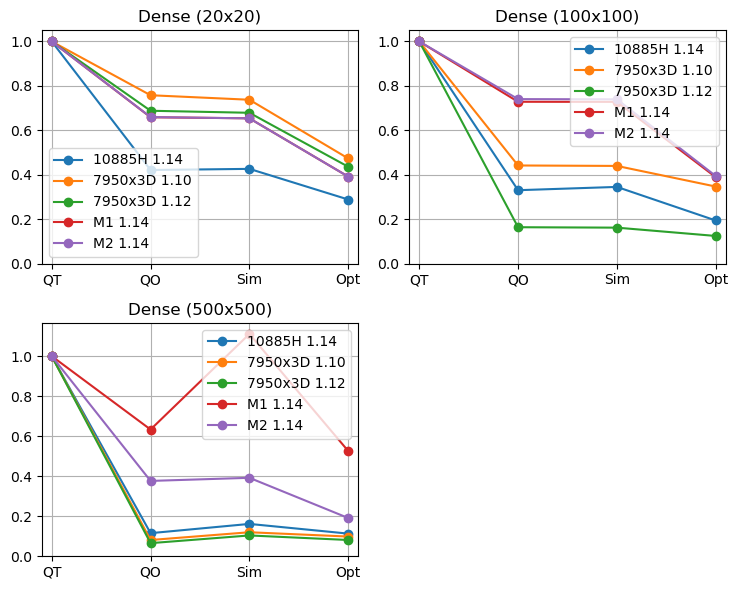

In [6]:
figure(figsize=[7.5, 6])

subplot(2, 2, 1)
plot_column(1)
title("Dense (20x20)")

subplot(2, 2, 2)
plot_column(2)
title("Dense (100x100)")

subplot(2, 2, 3)
plot_column(3)
title("Dense (500x500)")

tight_layout()
savefig("imgs/dense.png", bbox_inches="tight", transparent=true)

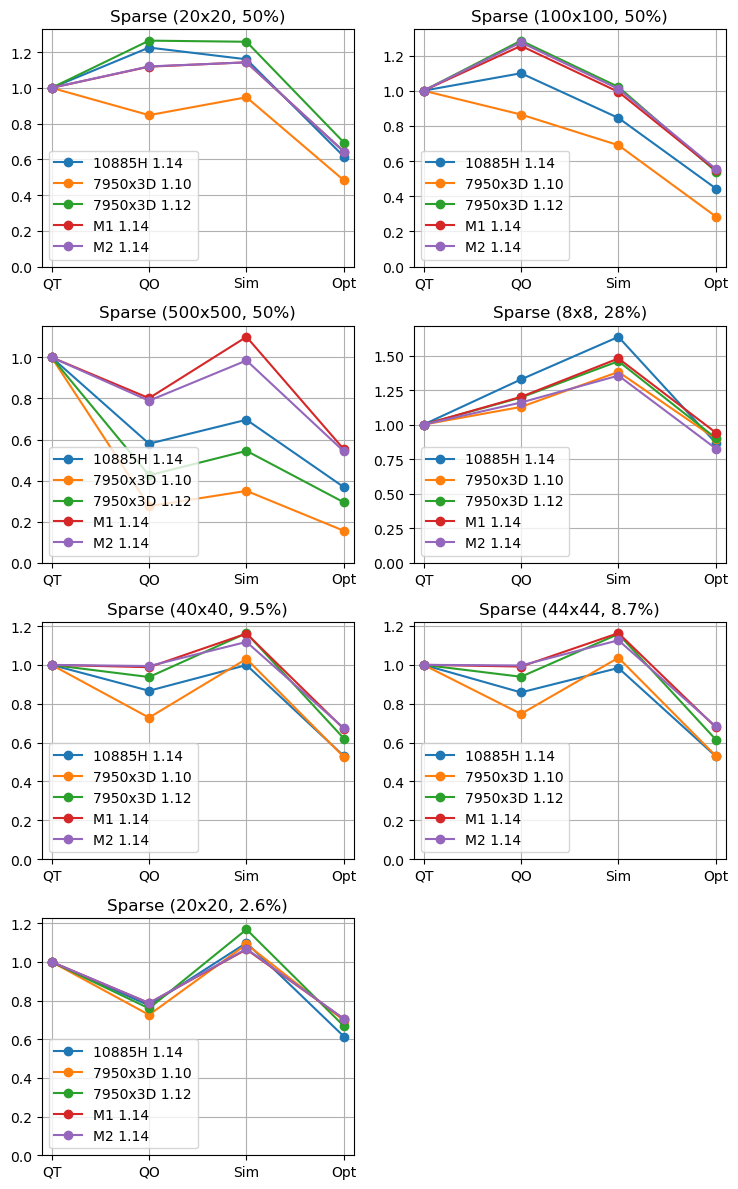

In [7]:
figure(figsize=[7.5, 12])

subplot(4, 2, 1)
plot_column(4)
title("Sparse (20x20, 50%)")

subplot(4, 2, 2)
plot_column(5)
title("Sparse (100x100, 50%)")

subplot(4, 2, 3)
plot_column(6)
title("Sparse (500x500, 50%)")

subplot(4, 2, 4)
plot_column(9)
title("Sparse (8x8, 28%)")

subplot(4, 2, 5)
plot_column(8)
title("Sparse (40x40, 9.5%)")

subplot(4, 2, 6)
plot_column(7)
title("Sparse (44x44, 8.7%)")

subplot(4, 2, 7)
plot_column(10)
title("Sparse (20x20, 2.6%)")

tight_layout()
savefig("imgs/sparse.png", bbox_inches="tight", transparent=true)